In [29]:
#STEP 1: IMPORT PACKAGES AND LIBRARIES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import regex as re
import snscrape.modules.twitter as sntwitter
import stylecloud
import seaborn as sns
from googletrans import Translator
from IPython.display import Image as Image1
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from tqdm.notebook import tqdm
from wordcloud import WordCloud
from PIL import Image as Image2

In [4]:
#STEP 2: SCRAPING THE DATA

query ='turkiye'
scraper = sntwitter.TwitterSearchScraper(query)
tweets = []
limit = 100

for i, tweet in enumerate(scraper.get_items()):
    
    data = [
        tweet.date,
        tweet.user.username,
        tweet.user.id,
        tweet.user.verified,
        tweet.user.created,
        tweet.user.followersCount,
        tweet.user.friendsCount,
        tweet.user.statusesCount,
        tweet.user.location,
        tweet.replyCount,
        tweet.retweetCount,
        tweet.likeCount,
        tweet.lang,
        tweet.coordinates,
        tweet.viewCount,
        tweet.renderedContent
        
    ]
    
    tweets.append(data)  
    
    if i > limit:
        break
        
tweets_df = pd.DataFrame(tweets, columns = ['Date',
                                            'Username',
                                            'User_id',
                                            'User_verified',
                                            'User_creation_date',
                                            'User_Followers',
                                            'User_Friends',
                                            'User_status_numbers',
                                            'User_location',
                                            'ReplyCount',
                                            'RetweetCount',
                                            'LikeCount',
                                            'Lang',
                                            'Coordinates',
                                            'ViewCount',
                                            'Content'
                                           ])

print(tweets_df)

                         Date         Username              User_id  \
0   2023-02-28 04:23:10+00:00  breakingturkish           3290947790   
1   2023-02-28 04:22:23+00:00       10xnewsxyz   806845765326934017   
2   2023-02-28 04:21:37+00:00     andresetas10  1334013360896139264   
3   2023-02-28 04:20:46+00:00      TheSahuNews  1276495633520754689   
4   2023-02-28 04:19:53+00:00      cccalbazana  1614062291011469312   
..                        ...              ...                  ...   
97  2023-02-28 03:07:07+00:00      Media_Rania  1358762018359046145   
98  2023-02-28 03:07:07+00:00            MCAHQ            198736746   
99  2023-02-28 03:05:52+00:00    KolaogluYasar  1483909946827808775   
100 2023-02-28 03:03:40+00:00    Blac_KateMoss            158958513   
101 2023-02-28 03:02:46+00:00      HaziqKapten  1135900018110373888   

     User_verified        User_creation_date  User_Followers  User_Friends  \
0            False 2015-07-24 19:41:36+00:00           10461         

In [5]:
#STEP 3: CLEANING THE TWEETS

def clean_tweet(tweet):
    
    ##Lowering all the letters
    temp = tweet.lower()

    ##Removing hashtags and mentions
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)

    ##Removing links
    temp = re.sub(r"http\S+", "", temp)
    temp = re.sub(r"www.\S+", "", temp)

    ##Removing punctuations
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)

    ##Filtering non-alphanumeric characters
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub(r'[0-9]+','', temp)              
        
    ##Translating multiple language into single lang
    translater = Translator()
    out = translater.translate(temp, dest='en')
    temp = out.text
    
    ##Tokenization
    temp = temp.split()
    
    ##Stopwords removal
    stopword = stopwords.words('english')
    temp = [w for w in temp if not w in stopword]
    temp = " ".join(word for word in temp)

    return temp

tweets_df['Cleaned_Content'] = [clean_tweet(tweet) for tweet in tweets_df['Content']]
tweets_df.drop('Content', inplace=True, axis=1)
tweets_df.to_csv('cleaned_tweets_python.csv')

print(tweets_df)

                         Date         Username              User_id  \
0   2023-02-28 04:23:10+00:00  breakingturkish           3290947790   
1   2023-02-28 04:22:23+00:00       10xnewsxyz   806845765326934017   
2   2023-02-28 04:21:37+00:00     andresetas10  1334013360896139264   
3   2023-02-28 04:20:46+00:00      TheSahuNews  1276495633520754689   
4   2023-02-28 04:19:53+00:00      cccalbazana  1614062291011469312   
..                        ...              ...                  ...   
97  2023-02-28 03:07:07+00:00      Media_Rania  1358762018359046145   
98  2023-02-28 03:07:07+00:00            MCAHQ            198736746   
99  2023-02-28 03:05:52+00:00    KolaogluYasar  1483909946827808775   
100 2023-02-28 03:03:40+00:00    Blac_KateMoss            158958513   
101 2023-02-28 03:02:46+00:00      HaziqKapten  1135900018110373888   

     User_verified        User_creation_date  User_Followers  User_Friends  \
0            False 2015-07-24 19:41:36+00:00           10461         

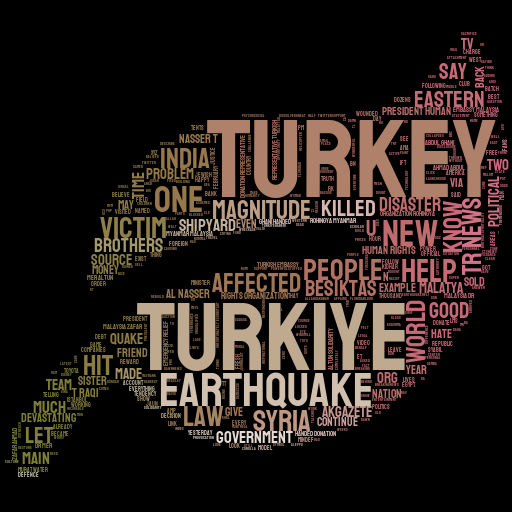

In [16]:
#STEP 4: MAKE A WORDCLOUD FROM CLEANED TWEETS

tweets_df['Cleaned_Content'].to_csv('tweets_only.csv', index=False)

stylecloud.gen_stylecloud(file_path='tweets_only.csv',
                           icon_name='fas fa-leaf',
                           palette='cartocolors.diverging.ArmyRose_2',
                           background_color='black',
                           gradient='horizontal',
                           stopwords=True)

Image1('stylecloud.png')

In [19]:
#STEP 5: BASIC SENTIMENT ANALYSIS

tweets_df['sentiment_score'] = [TextBlob(tweet).sentiment.polarity for tweet in tweets_df['Cleaned_Content']]

for i, tweet in enumerate(tweets_df['sentiment_score']):
    
    if tweet > 0:
        tweets_df.loc[i,'sentiment'] = 'Positive'
     
    elif tweet == 0:
        tweets_df.loc[i,'sentiment'] = 'Neutral'
        
    else:
        tweets_df.loc[i,'sentiment'] = 'Negative'

print(tweets_df[['Cleaned_Content','sentiment_score','sentiment']])

                                       Cleaned_Content  sentiment_score  \
0    The power walt disney entertainment center flo...        -0.100000   
1    magnitude earthquake hit eastern turkey tv new...         0.000000   
2                                    Al-Nasser T. Raqi         0.000000   
3    one killed dozens wounded fresh quake eastern ...        -0.033333   
4            care libya judah well syria parts turkiye         0.000000   
..                                                 ...              ...   
97   number casualties southern Italy became intern...         0.000000   
98   adage dogs men people best friend closest trut...         0.250000   
99   Haji sister, raki beer bottles table, traitors...         0.000000   
100              back turkey april may black kate moss        -0.083333   
101  malaysia ministries defence tendency look turk...        -0.100000   

    sentiment  
0    Negative  
1     Neutral  
2     Neutral  
3    Negative  
4     Neutral  
.. 

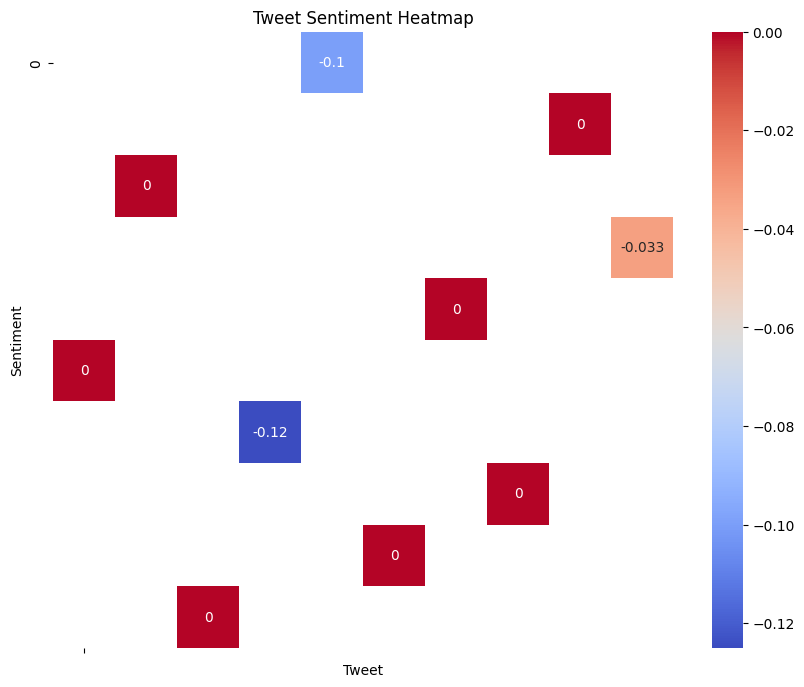

In [41]:
#STEP 6: VISUALIZE SENTIMENT IN HEATMAPS

heatmap_data = tweets_df.iloc[:10].pivot(index=None, columns='Cleaned_Content', values='sentiment_score')

# create the figure and adjust the size
plt.figure(figsize=(10, 8))

# create the heatmap using Seaborn
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, xticklabels=100, yticklabels=10)

# set chart title and axis labels
plt.title('Tweet Sentiment Heatmap')
plt.xlabel('Tweet')
plt.ylabel('Sentiment')

# display the chart
plt.show()

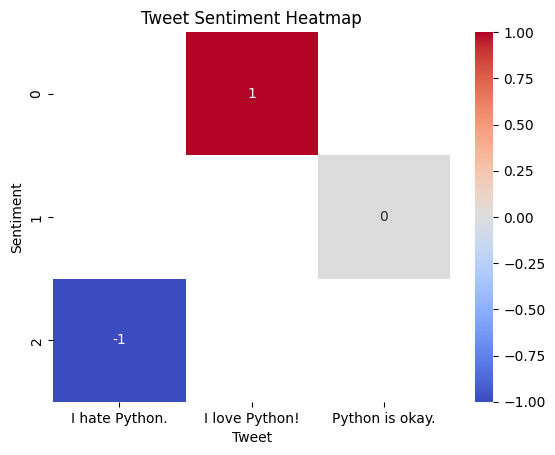

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create example DataFrame with sentiment scores for each tweet
data = {'tweet': ['I love Python!', 'Python is okay.', 'I hate Python.'], 'sentiment': [1, 0, -1]}
df = pd.DataFrame(data)

# pivot the DataFrame to create a heatmap
heatmap_data = df.pivot(index=None, columns='tweet', values='sentiment')

# create the heatmap using Seaborn
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# set chart title and axis labels
plt.title('Tweet Sentiment Heatmap')
plt.xlabel('Tweet')
plt.ylabel('Sentiment')

# display the chart
plt.show()

In [36]:
print(tweets_df.iloc[:20])

                        Date         Username              User_id  \
0  2023-02-28 04:23:10+00:00  breakingturkish           3290947790   
1  2023-02-28 04:22:23+00:00       10xnewsxyz   806845765326934017   
2  2023-02-28 04:21:37+00:00     andresetas10  1334013360896139264   
3  2023-02-28 04:20:46+00:00      TheSahuNews  1276495633520754689   
4  2023-02-28 04:19:53+00:00      cccalbazana  1614062291011469312   
5  2023-02-28 04:19:33+00:00      PTITurkiye_  1241711010374877188   
6  2023-02-28 04:18:52+00:00  TurkiyeHaberiTR  1182382318507438081   
7  2023-02-28 04:18:29+00:00     VolunteerMVM           4488414914   
8  2023-02-28 04:18:28+00:00     VolunteerMVM           4488414914   
9  2023-02-28 04:18:03+00:00  AkGazeteTurkiye           3157645948   
10 2023-02-28 04:17:13+00:00       saleemkhan              2371631   
11 2023-02-28 04:16:43+00:00       emrejesuss  1488895942636019716   
12 2023-02-28 04:16:20+00:00   MulekaMulekaMk  1526789544418463749   
13 2023-02-28 04:15: